
# Data Preprocessing - Heart Disease Dataset

## Steps to Complete:
1. **Load** the Heart Disease UCI dataset into a Pandas DataFrame
2. **Handle missing values** (imputation or removal)
3. **Perform data encoding** (one-hot encoding for categorical variables)
4. **Standardize numerical features** using MinMaxScaler or StandardScaler
5. **Conduct Exploratory Data Analysis** (EDA)** with histograms, correlation heatmaps, and boxplots

## Deliverable:
- ✔ Cleaned dataset ready for modeling




In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

print("Libraries loaded!")


Libraries loaded!


In [30]:

# Step 1: Load the Heart Disease UCI dataset into a Pandas DataFrame
print("Step 1: Loading Heart Disease UCI dataset...")

column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

df = pd.read_csv('../data/Heart_Disease.csv', names=column_names, na_values='?')

print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("Step 1 complete!")
df.head(50)


Step 1: Loading Heart Disease UCI dataset...
Dataset shape: (303, 14)
Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
Step 1 complete!


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [3]:
# Step 2: Handle missing values (imputation or removal)
print("Step 2: Handling missing values...")

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])

# Remove rows with missing values
df_clean = df.dropna()
print(f"Original shape: {df.shape}")
print(f"After removing missing values: {df_clean.shape}")
print(f"Rows removed: {df.shape[0] - df_clean.shape[0]}")
print("Step 2 complete!")

Step 2: Handling missing values...
Missing values in each column:
ca      4
thal    2
dtype: int64
Original shape: (303, 14)
After removing missing values: (297, 14)
Rows removed: 6
Step 2 complete!


In [4]:
# Step 3: Perform data encoding (one-hot encoding for categorical variables)
print("Step 3: Performing data encoding...")

# Identify categorical columns that need encoding
categorical_columns = ['cp', 'restecg', 'slope', 'ca', 'thal']
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
binary_columns = ['sex', 'fbs', 'exang', 'target']

print(f"Categorical columns to encode: {categorical_columns}")
print(f"Numerical columns: {numerical_columns}")
print(f"Binary columns: {binary_columns}")

# Perform one-hot encoding using pandas get_dummies()
df_encoded = pd.get_dummies(df_clean, columns=categorical_columns, prefix=categorical_columns)

print(f"Original shape: {df_clean.shape}")
print(f"After encoding: {df_encoded.shape}")
print(f"New columns: {list(df_encoded.columns)}")
print("Step 3 complete!")
df_encoded.head()


Step 3: Performing data encoding...
Categorical columns to encode: ['cp', 'restecg', 'slope', 'ca', 'thal']
Numerical columns: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
Binary columns: ['sex', 'fbs', 'exang', 'target']
Original shape: (297, 14)
After encoding: (297, 26)
New columns: ['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak', 'target', 'cp_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'restecg_0.0', 'restecg_1.0', 'restecg_2.0', 'slope_1.0', 'slope_2.0', 'slope_3.0', 'ca_0.0', 'ca_1.0', 'ca_2.0', 'ca_3.0', 'thal_3.0', 'thal_6.0', 'thal_7.0']
Step 3 complete!


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_1.0,...,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0,True,...,False,False,True,True,False,False,False,False,True,False
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,2,False,...,False,True,False,False,False,False,True,True,False,False
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,1,False,...,False,True,False,False,False,True,False,False,False,True
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0,False,...,False,False,True,True,False,False,False,True,False,False
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0,False,...,True,False,False,True,False,False,False,True,False,False


In [5]:
# Step 4: Standardize numerical features using StandardScaler
print("Step 4: Standardizing numerical features...")

# Apply StandardScaler to numerical columns
scaler = StandardScaler()
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

# Check mean and std after standardization
print("Mean and Standard Deviation after StandardScaler:")
for col in numerical_columns:
    mean_val = df_encoded[col].mean()
    std_val = df_encoded[col].std()
    print(f"   {col}: Mean = {mean_val:.6f}, Std = {std_val:.6f}")

print("Step 4 complete!")
df_encoded.head()


Step 4: Standardizing numerical features...
Mean and Standard Deviation after StandardScaler:
   age: Mean = -0.000000, Std = 1.001688
   trestbps: Mean = 0.000000, Std = 1.001688
   chol: Mean = -0.000000, Std = 1.001688
   thalach: Mean = 0.000000, Std = 1.001688
   oldpeak: Mean = 0.000000, Std = 1.001688
Step 4 complete!


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_1.0,...,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,0.936181,1.0,0.750380,-0.276443,1.0,0.017494,0.0,1.068965,0,True,...,False,False,True,True,False,False,False,False,True,False
1,1.378929,1.0,1.596266,0.744555,0.0,-1.816334,1.0,0.381773,2,False,...,False,True,False,False,False,False,True,True,False,False
2,1.378929,1.0,-0.659431,-0.353500,0.0,-0.899420,1.0,1.326662,1,False,...,False,True,False,False,False,True,False,False,False,True
3,-1.941680,1.0,-0.095506,0.051047,0.0,1.633010,0.0,2.099753,0,False,...,False,False,True,True,False,False,False,True,False,False
4,-1.498933,0.0,-0.095506,-0.835103,0.0,0.978071,0.0,0.295874,0,False,...,True,False,False,True,False,False,False,True,False,False


Step 5: Conducting Exploratory Data Analysis...
Creating histograms...


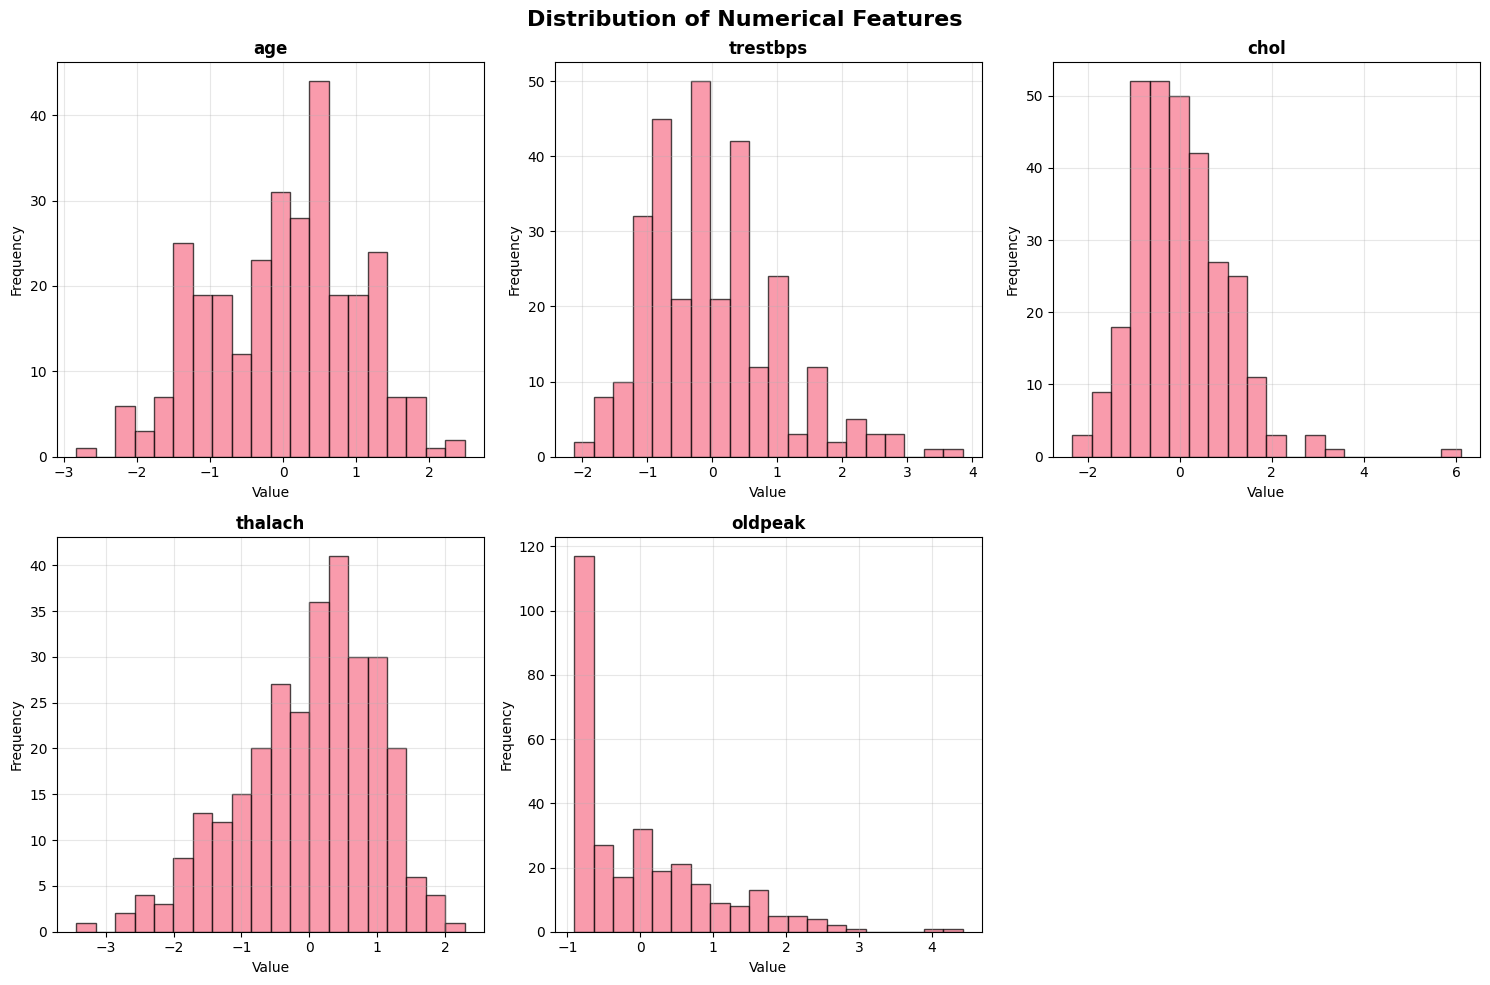

Histograms completed!


In [11]:
# Step 5: Conduct Exploratory Data Analysis (EDA) with histograms, correlation heatmaps, and boxplots
print("Step 5: Conducting Exploratory Data Analysis...")

# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# 5.1 Histograms for numerical columns
print("Creating histograms...")
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribution of Numerical Features', fontsize=16, fontweight='bold')

for i, col in enumerate(numerical_columns):
    row = i // 3
    col_idx = i % 3
    axes[row, col_idx].hist(df_encoded[col], bins=20, alpha=0.7, edgecolor='black')
    axes[row, col_idx].set_title(f'{col}', fontweight='bold')
    axes[row, col_idx].set_xlabel('Value')
    axes[row, col_idx].set_ylabel('Frequency')
    axes[row, col_idx].grid(True, alpha=0.3)

# Remove empty subplot
axes[1, 2].remove()
plt.tight_layout()
plt.show()

print("Histograms completed!")


Creating boxplots...


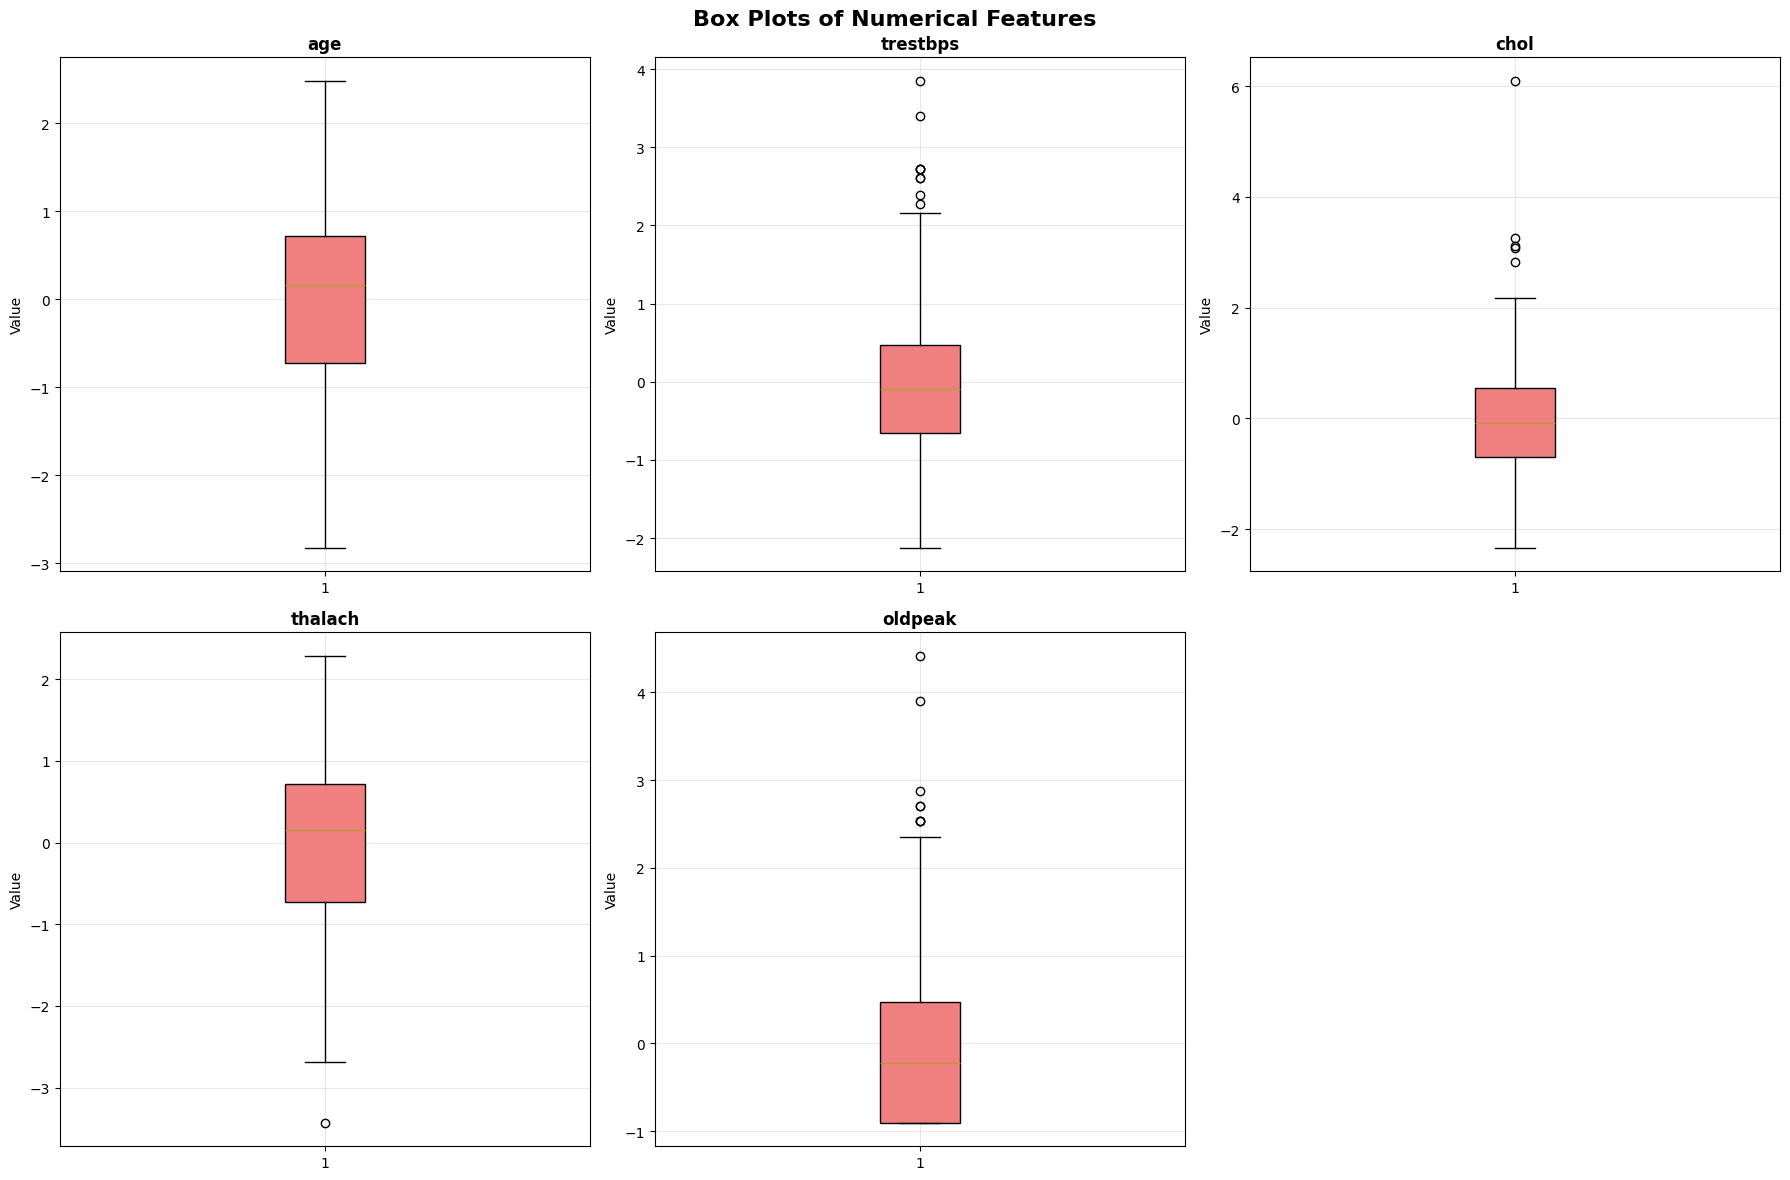

Boxplots completed!


In [7]:
# 5.2 Boxplots for numerical columns
print("Creating boxplots...")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Box Plots of Numerical Features', fontsize=16, fontweight='bold')

for i, col in enumerate(numerical_columns):
    row = i // 3
    col_idx = i % 3
    box_plot = axes[row, col_idx].boxplot(df_encoded[col], patch_artist=True)
    box_plot['boxes'][0].set_facecolor('lightcoral')
    axes[row, col_idx].set_title(f'{col}', fontweight='bold', fontsize=12)
    axes[row, col_idx].set_ylabel('Value', fontsize=10)
    axes[row, col_idx].grid(True, alpha=0.3)

# Remove empty subplot
axes[1, 2].remove()
plt.tight_layout()
plt.show()

print("Boxplots completed!")


Creating correlation heatmap...


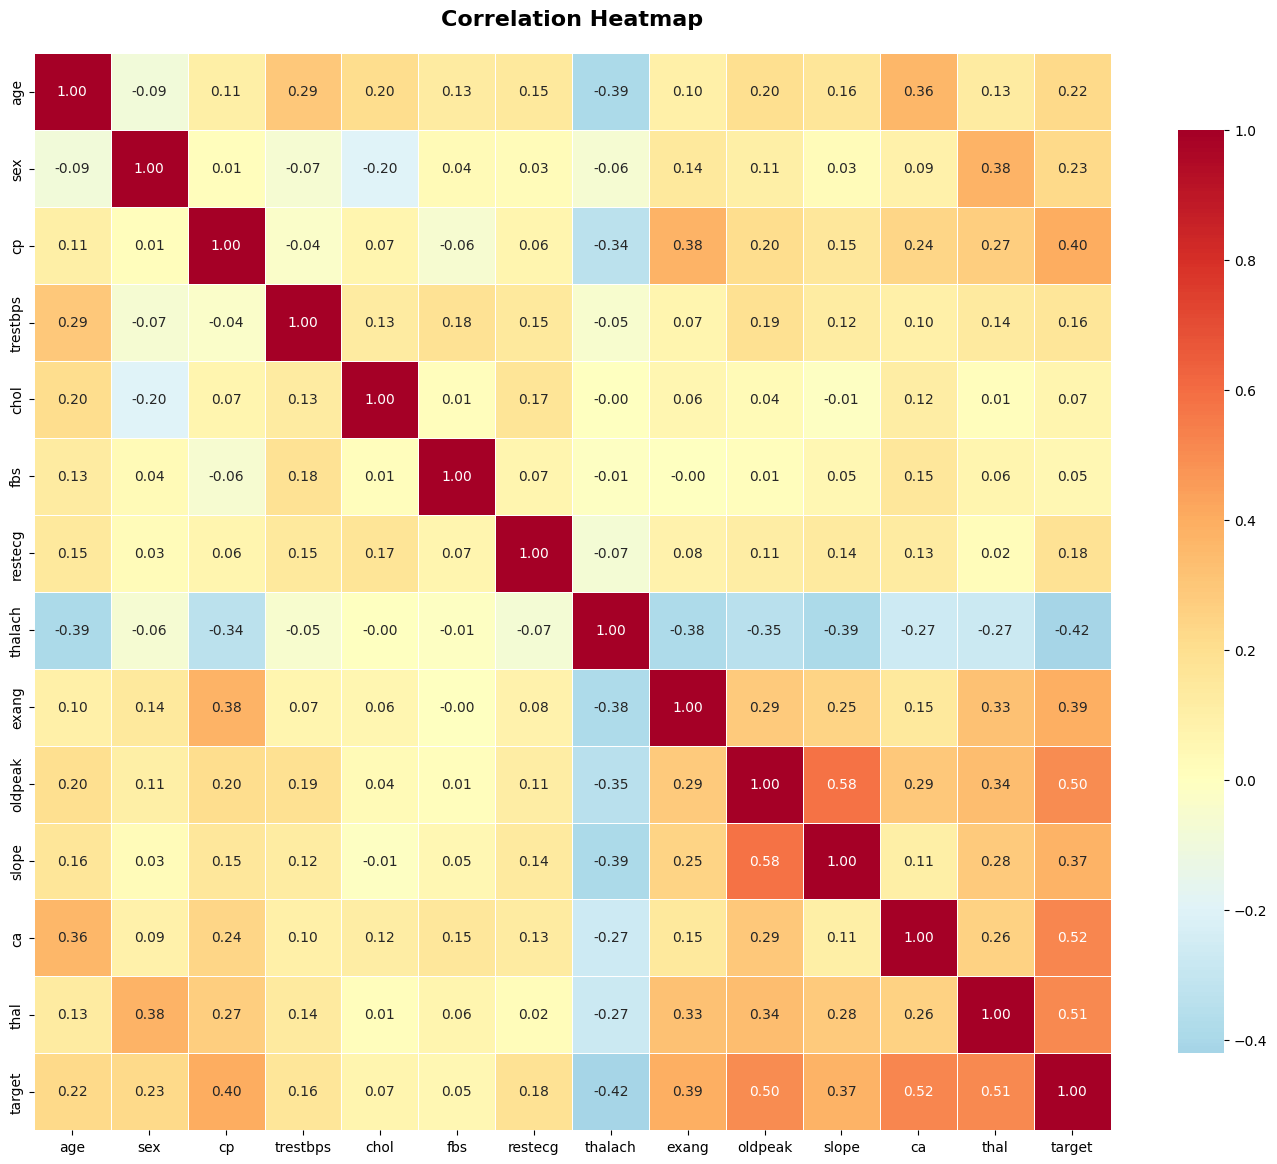

Correlation heatmap completed!
Step 5 complete!


In [8]:
# 5.3 Correlation heatmap
print("Creating correlation heatmap...")

# Use the original dataset (before one-hot encoding) for correlation heatmap
original_columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
                   'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Create correlation matrix for original columns
correlation_matrix = df_clean[original_columns].corr()

# Create the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='RdYlBu_r',
            center=0,
            square=True, 
            linewidths=0.5,
            cbar_kws={"shrink": 0.8},
            fmt='.2f',
            annot_kws={'size': 10})

plt.title('Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("Correlation heatmap completed!")
print("Step 5 complete!")


In [25]:
# Create cleaned dataset ready for modeling (Deliverable)
print("Creating cleaned dataset ready for modeling...")

# Create binary target variable for easier modeling
df_encoded['target_binary'] = (df_encoded['target'] > 0).astype(int)

# save cleaned dataset
df_encoded.to_csv('../data/Heart_Disease_Clean.csv', index=False)

print(f"Final cleaned dataset:")
print(f"- Shape: {df_encoded.shape}")
print(f"- Features: {df_encoded.shape[1]}")
print(f"- Samples: {df_encoded.shape[0]}")

print("✅ Deliverable: Cleaned dataset ready for modeling!")
df_encoded.head()


Creating cleaned dataset ready for modeling...
Final cleaned dataset:
- Shape: (297, 27)
- Features: 27
- Samples: 297
✅ Deliverable: Cleaned dataset ready for modeling!


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_1.0,...,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0,target_binary
0,0.936181,1.0,0.750380,-0.276443,1.0,0.017494,0.0,1.068965,0,True,...,False,True,True,False,False,False,False,True,False,0
1,1.378929,1.0,1.596266,0.744555,0.0,-1.816334,1.0,0.381773,2,False,...,True,False,False,False,False,True,True,False,False,1
2,1.378929,1.0,-0.659431,-0.353500,0.0,-0.899420,1.0,1.326662,1,False,...,True,False,False,False,True,False,False,False,True,1
3,-1.941680,1.0,-0.095506,0.051047,0.0,1.633010,0.0,2.099753,0,False,...,False,True,True,False,False,False,True,False,False,0
4,-1.498933,0.0,-0.095506,-0.835103,0.0,0.978071,0.0,0.295874,0,False,...,False,False,True,False,False,False,True,False,False,0


## Deliverables Completed

### ✅ Step 1: Load the Heart Disease UCI dataset into a Pandas DataFrame
- Loaded dataset with 303 samples and 14 features
- Applied proper column names and handled missing value indicators

### ✅ Step 2: Handle missing values (imputation or removal)
- Identified missing values in 'ca' (4 missing) and 'thal' (2 missing) columns
- Removed 6 rows with missing values, resulting in 297 samples

### ✅ Step 3: Perform data encoding (one-hot encoding for categorical variables)
- Applied one-hot encoding to categorical columns: cp, restecg, slope, ca, thal
- Expanded dataset from 14 to 26 features

### ✅ Step 4: Standardize numerical features using StandardScaler
- Standardized numerical columns: age, trestbps, chol, thalach, oldpeak
- All numerical features now have mean ≈ 0 and std ≈ 1

### ✅ Step 5: Conduct Exploratory Data Analysis (EDA)
- **Histograms**: Distribution analysis of numerical features
- **Boxplots**: Outlier detection and distribution comparison
- **Correlation Heatmap**: Feature relationship analysis

### ✅ Deliverable: Cleaned dataset ready for modeling
- Final dataset: 297 samples × 27 features (including target_binary)
- DataFrame `df_encoded` ready for PCA analysis and machine learning models
